   Location  Size  BHK  Bathroom  Property_age   Rent
0    Uptown  1100    2         2             6  10000
1    Uptown   800    2         1            12  20000
2    Uptown  1000    2         1             8  17000
3  Downtown   800    2         1             5  10000
4  Downtown   850    2         1             4   7500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      21 non-null     object
 1   Size          21 non-null     int64 
 2   BHK           21 non-null     int64 
 3   Bathroom      21 non-null     int64 
 4   Property_age  21 non-null     int64 
 5   Rent          21 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None
              Size        BHK   Bathroom  Property_age          Rent
count    21.000000  21.000000  21.000000     21.000000     21.000000
mean    810.523810   1.952381   1.380952     

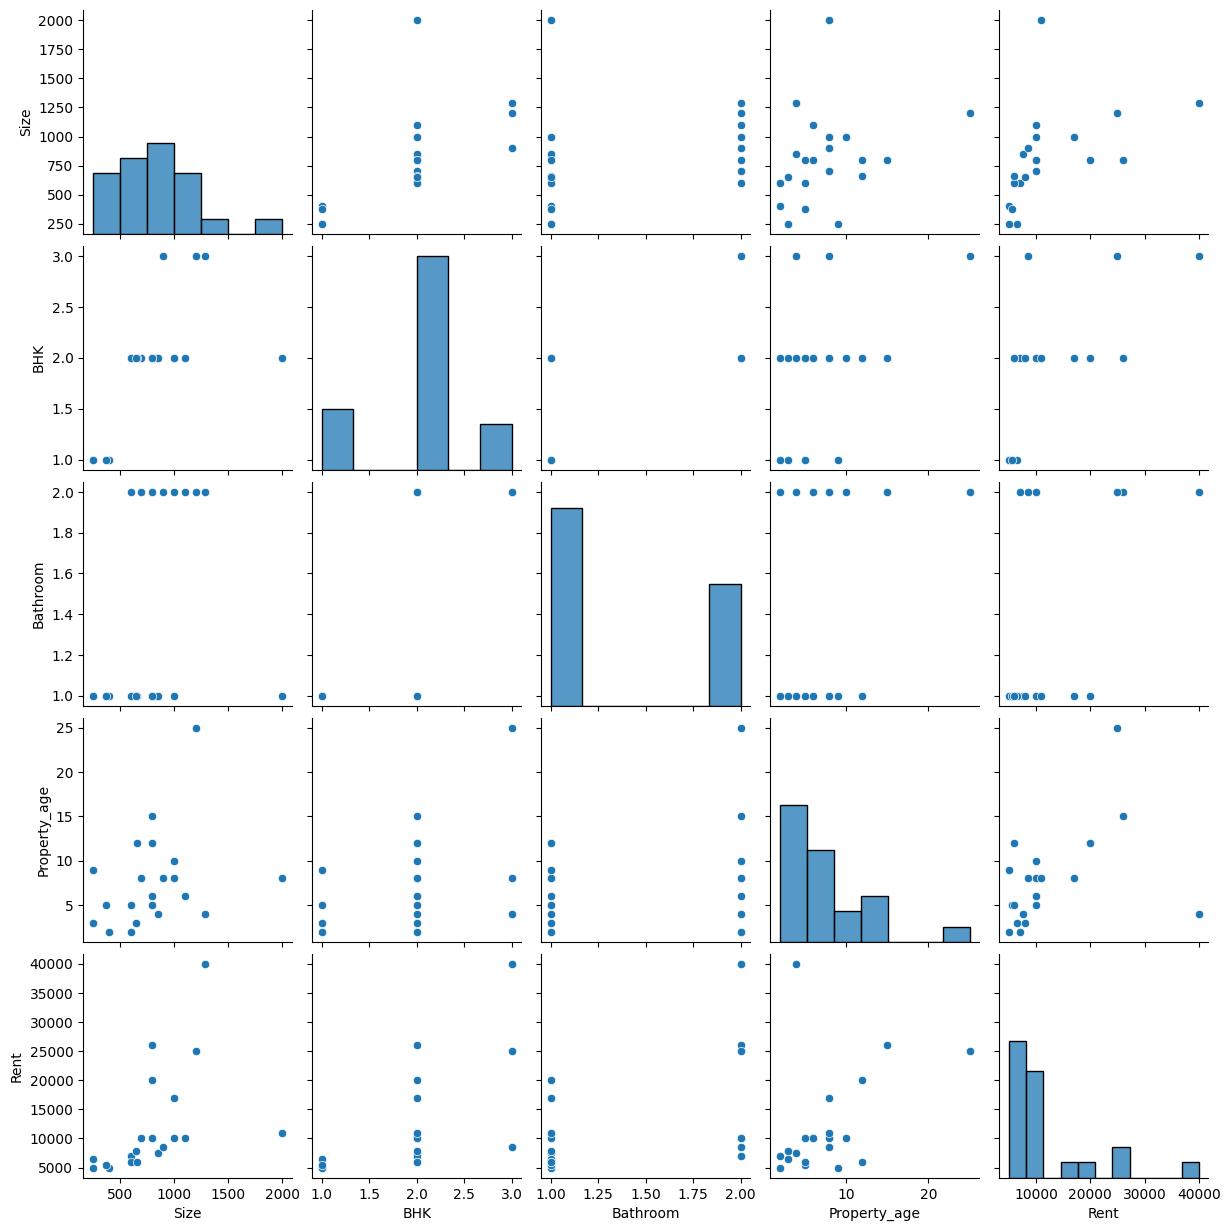

Mean Absolute Error :11143.4
Mean Squared Error:208492495.8
Root Main Squared Error:14439.269226661023


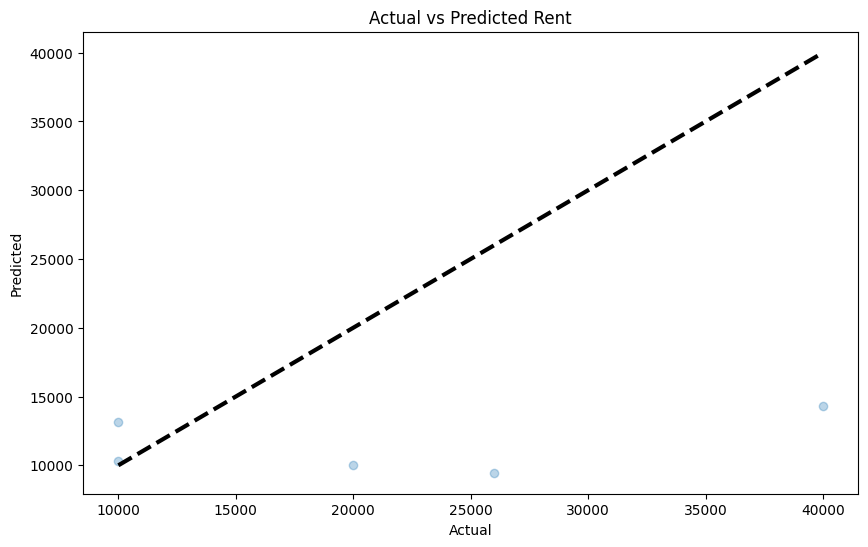

Predicted Rent: $9175.00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
data=pd.read_csv('Houserent.csv')
print(data.head())
print(data.info())
print(data.describe())
sns.pairplot(data)
plt.show()
X=data.drop('Rent',axis=1)
Y=data['Rent']
categorial_feature=X.select_dtypes(include=['object']).columns
numeric_feature=X.select_dtypes(include=[np.number]).columns
preprosser=ColumnTransformer(transformers=[('num',StandardScaler(),numeric_feature),('cat',OneHotEncoder(),categorial_feature)])
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=Pipeline(steps=[('preprosser',preprosser),('regressor',RandomForestRegressor(n_estimators=100,random_state=42))])
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
assert X_train.shape[0] == Y_train.shape[0]
assert X_test.shape[0] == Y_test.shape[0]

mae= mean_absolute_error(Y_test,y_pred)
mse= mean_squared_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Mean Absolute Error :{mae}')
print(f"Mean Squared Error:{mse}")
print(f"Root Main Squared Error:{rmse}")
plt.figure(figsize=(10,6))
plt.scatter(Y_test,y_pred,alpha=0.3)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],'k--',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted Rent")
plt.show()
new_data = pd.DataFrame({
    'Location': ['Downtown'],
    'Size': [850],
    'BHK': [2],
    'Bathroom': [1],
    'Property_age':[10]
})
predicted_rent = model.predict(new_data)
print(f'Predicted Rent: ${predicted_rent[0]:.2f}')